In [ ]:
#Github https://github.com/jlchinnery01/DSCI-235_Project

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
df = pd.read_csv('https://raw.githubusercontent.com/jlchinnery01/DSCI-235_Project/refs/heads/main/FOSS_landings.csv', low_memory=False)
df.columns = df.iloc[0]  
df = df.drop(df.index[0]) 
df.reset_index(drop=True, inplace=True) 

In [16]:
print(df.shape)
df.head()

(131953, 11)


,Year,State,NMFS Name,Pounds,Metric Tons,Dollars,Confidentiality,Collection,Scientific Name,Tsn,Source
0,2023,ALABAMA,"AMBERJACK, GREATER","18,117",8,"31,835",Public,Commercial,Seriola dumerili,168689,GULFFIN
1,2023,ALABAMA,AMBERJACKS **,NaN,NaN,NaN,Confidential,Commercial,Seriola,168688,GULFFIN
2,2023,ALABAMA,ANCHOVIES **,NaN,NaN,NaN,Confidential,Commercial,Engraulidae,553173,GULFFIN
3,2023,ALABAMA,"BARRACUDAS, SPHYRAENIDAE (FAMILY) **","12,917",6,"35,475",Public,Commercial,Sphyraenidae,170424,GULFFIN
4,2023,ALABAMA,BARRELFISH,NaN,NaN,NaN,Confidential,Commercial,Hyperoglyphe perciformis,172512,GULFFIN


This data Is from NOAA and encompasses recreational and commercial fishing data from 1950 - 2023

### Cleanup

- Check that all confidential values are NaN
- Investigate NA's values not conifidential 

In [46]:
conf = df[df['Confidentiality'] == 'Confidential']
print(conf.isna().sum())
print(conf.shape)
mask = conf['Pounds'].notna()
values = conf[mask]
conf = conf[~mask]

0
Year                   0
State                  0
NMFS Name             14
Pounds             18241
Metric Tons        18241
Dollars            18241
Confidentiality        0
Collection             0
Scientific Name       27
Tsn                   13
Source                 0
dtype: int64
(18662, 11)


- Given that remaining NA's are < 2% of the data I decided to drop th

In [50]:
print(df[df['Confidentiality'] != 'Confidential'].isna().sum())
main_na = df[df['Confidentiality'] != 'Confidential'].isna()
no_conf = df[df['Confidentiality'] != 'Confidential'].dropna()

0
Year                  0
State                 0
NMFS Name            34
Pounds              195
Metric Tons         195
Dollars            2184
Confidentiality       0
Collection            0
Scientific Name      34
Tsn                  34
Source                0
dtype: int64


- Quick check of head as well as unique to check for weird state spellings

In [25]:
print(conf["State"].unique())
values.head()

['ALABAMA' 'CALIFORNIA' 'LOUISIANA' 'MISSISSIPPI' 'OREGON' 'TEXAS'
 'WASHINGTON' 'ALASKA']


,Year,State,NMFS Name,Pounds,Metric Tons,Dollars,Confidentiality,Collection,Scientific Name,Tsn,Source
1278,2023,HAWAII,WITHHELD FOR CONFIDENTIALITY,"353,578",160,"1,444,461",Confidential,Commercial,NaN,0,PIFSC
4321,2022,HAWAII,WITHHELD FOR CONFIDENTIALITY,"342,136",155,"1,778,679",Confidential,Commercial,NaN,0,PIFSC
7356,2021,HAWAII,WITHHELD FOR CONFIDENTIALITY,"17,266",8,"102,769",Confidential,Commercial,NaN,0,PIFSC
10437,2020,HAWAII,WITHHELD FOR CONFIDENTIALITY,"821,332",373,"1,757,504",Confidential,Commercial,NaN,0,PIFSC
13512,2019,HAWAII,WITHHELD FOR CONFIDENTIALITY,"95,206",43,"233,551",Confidential,Commercial,NaN,0,PIFSC


Spotted a different format for confidential info that was not caught in my intial run of dropnadecided to investigate
- Quick check for weird spellings to watch out for

In [27]:
print(values['NMFS Name'].unique())
conf_no_withheld = values[values['NMFS Name'] != 'WITHHELD FOR CONFIDENTIALITY']
conf_no_withheld.shape

['WITHHELD FOR CONFIDENTIALITY' 'SHARKS, CHONDRICHTHYES (CLASS) **'
 'VERTEBRATES, JAWED' 'CRUSTACEANS **' 'ROCKFISHES **' 'OYSTER, EASTERN'
 'TUNA, BLACK SKIPJACK' 'HALIBUT, PACIFIC' 'SHRIMPS, PENAEID **'
 'SCALLOPS **' 'WHALES **' 'SHRIMP, MARINE **']


(408, 11)

By comparing the shapes we can see that the data marked as withheld is small and can be viewed directly

In [28]:
withheld = values[values['NMFS Name'] == 'WITHHELD FOR CONFIDENTIALITY']
withheld

,Year,State,NMFS Name,Pounds,Metric Tons,Dollars,Confidentiality,Collection,Scientific Name,Tsn,Source
1278,2023,HAWAII,WITHHELD FOR CONFIDENTIALITY,"353,578",160,"1,444,461",Confidential,Commercial,NaN,0,PIFSC
4321,2022,HAWAII,WITHHELD FOR CONFIDENTIALITY,"342,136",155,"1,778,679",Confidential,Commercial,NaN,0,PIFSC
7356,2021,HAWAII,WITHHELD FOR CONFIDENTIALITY,"17,266",8,"102,769",Confidential,Commercial,NaN,0,PIFSC
10437,2020,HAWAII,WITHHELD FOR CONFIDENTIALITY,"821,332",373,"1,757,504",Confidential,Commercial,NaN,0,PIFSC
13512,2019,HAWAII,WITHHELD FOR CONFIDENTIALITY,"95,206",43,"233,551",Confidential,Commercial,NaN,0,PIFSC
16637,2018,HAWAII,WITHHELD FOR CONFIDENTIALITY,"21,494",10,"164,877",Confidential,Commercial,NaN,0,PIFSC
19875,2017,HAWAII,WITHHELD FOR CONFIDENTIALITY,"15,507",7,"77,167",Confidential,Commercial,NaN,0,PIFSC
23148,2016,HAWAII,WITHHELD FOR CONFIDENTIALITY,"13,134",6,"72,134",Confidential,Commercial,NaN,0,PIFSC
26380,2015,HAWAII,WITHHELD FOR CONFIDENTIALITY,"11,247",5,"51,281",Confidential,Commercial,NaN,0,PIFSC
29605,2014,HAWAII,WITHHELD FOR CONFIDENTIALITY,"17,637",8,"182,464",Confidential,Commercial,NaN,0,PIFSC


- Now to check if this is all of Hawaii's confidental data

In [393]:
conf_no_withheld[conf_no_withheld['State'] == 'HAWAII']

,Year,State,NMFS Name,Pounds,Metric Tons,Dollars,Confidentiality,Collection,Scientific Name,Tsn,Source


Withholding the species seems to be a quirk exclusive to hawaii and is present for all confidental entries from hawaii

- All remaining confidential entries have full data
- conf_no_withheld will be merged back into the main dataset
- Hawaii entries will be moved to the set of NA values

In [30]:
conf_no_withheld.isna().sum()

0
Year               0
State              0
NMFS Name          0
Pounds             0
Metric Tons        0
Dollars            0
Confidentiality    0
Collection         0
Scientific Name    0
Tsn                0
Source             0
dtype: int64

In [81]:
na_master = pd.concat([conf,withheld,main_na],axis = 0)

- Histogram of states with most NA values

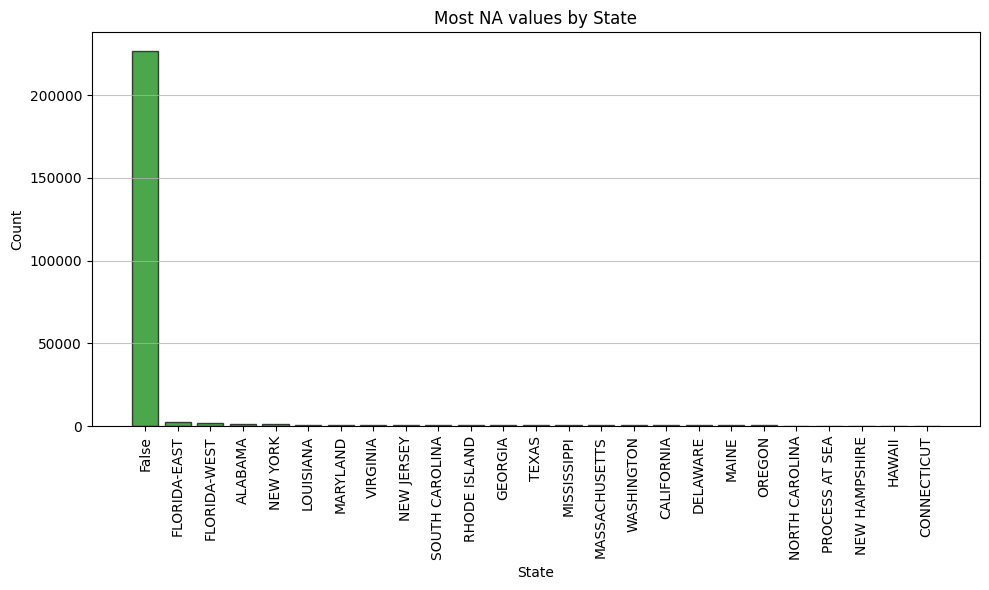

In [82]:
counts = na_master["State"].value_counts()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(x=range(len(counts)),  # Use numeric positions for x-axis
        height=counts.values,  # Count values for bar heights
        color='green', 
        edgecolor='black', 
        alpha=0.7)

# Customize x-axis to show state names
plt.xticks(ticks=range(len(counts)),  # Positions
           labels=counts.index,        # State names
           rotation=90)               # Rotate labels

plt.title('Most NA values by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Due to the prevalence of False values for state the same histogram without false values

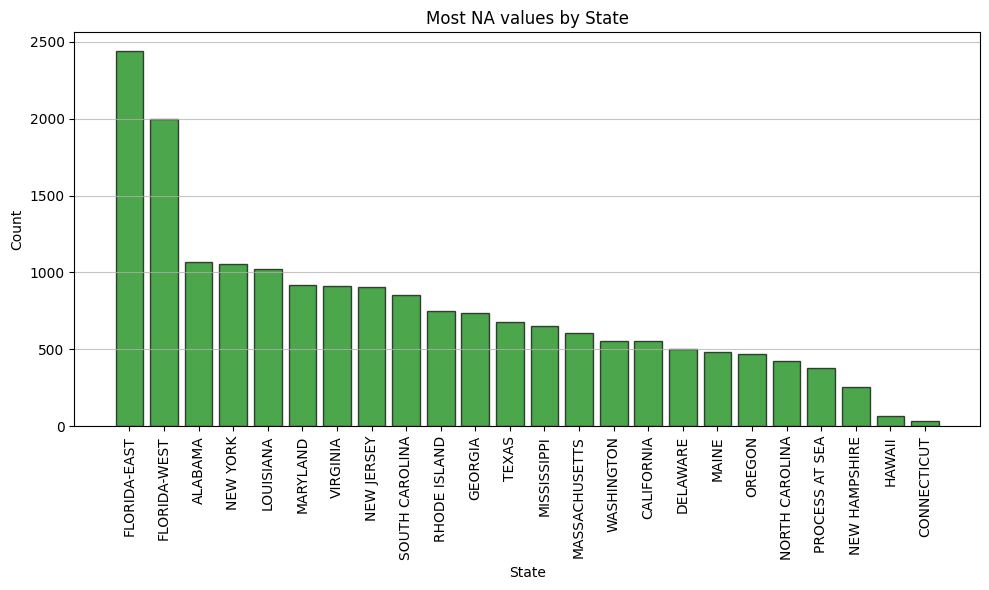

In [78]:
na_master = na_master[na_master['State'] != False]
counts = na_master["State"].value_counts()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(x=range(len(counts)),  # Use numeric positions for x-axis
        height=counts.values,  # Count values for bar heights
        color='green', 
        edgecolor='black', 
        alpha=0.7)

# Customize x-axis to show state names
plt.xticks(ticks=range(len(counts)),  # Positions
           labels=counts.index,        # State names
           rotation=90)               # Rotate labels

plt.title('Most NA values by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [394]:
values['NMFS Name'].value_counts()

NMFS Name
VERTEBRATES, JAWED                   157
CRUSTACEANS **                       117
SHRIMP, MARINE **                     43
HALIBUT, PACIFIC                      34
ROCKFISHES **                         25
SHARKS, CHONDRICHTHYES (CLASS) **     20
WITHHELD FOR CONFIDENTIALITY          13
SHRIMPS, PENAEID **                    7
TUNA, BLACK SKIPJACK                   2
OYSTER, EASTERN                        1
SCALLOPS **                            1
WHALES **                              1
Name: count, dtype: int64

-Apparently Jawed vertabrate is a massive categergory containing 99% of all living vertabrates I will remove it since its bascially just an other category
-conf_no_withheld will be merged back into the main set 

In [168]:
fish = pd.concat([no_conf,conf_no_withheld],axis = 0)
fish.reset_index(drop = True)
fish = fish[fish['NMFS Name'] != 'VERTEBRATES, JAWED']
fish.head()

,Year,State,NMFS Name,Pounds,Metric Tons,Dollars,Confidentiality,Collection,Scientific Name,Tsn,Source
0,2023,ALABAMA,"AMBERJACK, GREATER","18,117",8,"31,835",Public,Commercial,Seriola dumerili,168689,GULFFIN
3,2023,ALABAMA,"BARRACUDAS, SPHYRAENIDAE (FAMILY) **","12,917",6,"35,475",Public,Commercial,Sphyraenidae,170424,GULFFIN
8,2023,ALABAMA,BLUEFISH,"43,872",20,"23,971",Public,Commercial,Pomatomus saltatrix,168559,GULFFIN
10,2023,ALABAMA,BUFFALOFISHES **,"68,164",31,"26,903",Public,Commercial,Ictiobus,163954,GULFFIN
11,2023,ALABAMA,"BUMPER, ATLANTIC","17,938",8,"9,282",Public,Commercial,Chloroscombrus chrysurus,168670,GULFFIN


Check that pounds and tones are correlated with tonnes using conversion of 2204.62lbs to 1 metric ton
- First fixed some weird types

In [169]:
fish['Pounds'] = (
    fish['Pounds']
    .astype(str)
    .str.replace(',',"")
    .astype(float)
)

fish['Metric Tons'] = (
    fish['Metric Tons']
    .astype(str)
    .str.replace(',',"")
    .astype(float)
)


fish['Year'] = (
    fish['Year']
    .astype(str)
    .str.replace(',',"")
    .astype(int)
)

fish['Dollars'] = (
    fish['Dollars']
    .astype(str)
    .str.replace(',',"")
    .astype(float)
)

In [170]:
fish["Metric Tons Diff"] = (fish['Pounds'] / 2204.62) - fish["Metric Tons"]
fish['Metric Tons Diff'].sum()

np.float64(-272.92663587060343)

### Analysis

Given the over 10k rows I can safely call them equivalent minus some rounding error I will wuse pound s going forward and drop tons
- Drop scientific name since the common name is good enough and easier to recognize. Confidential since that has been dealt with and has been explored on its own already. Collection is also dropped because I forgot to pull the recreational data leaving the category redeundant 

In [171]:
fish.drop(['Metric Tons','Confidentiality',	'Scientific Name','Metric Tons Diff','Collection'],inplace = True, axis = 1)

In [172]:
fish.head()

,Year,State,NMFS Name,Pounds,Dollars,Tsn,Source
0,2023,ALABAMA,"AMBERJACK, GREATER",18117.0,31835.0,168689,GULFFIN
3,2023,ALABAMA,"BARRACUDAS, SPHYRAENIDAE (FAMILY) **",12917.0,35475.0,170424,GULFFIN
8,2023,ALABAMA,BLUEFISH,43872.0,23971.0,168559,GULFFIN
10,2023,ALABAMA,BUFFALOFISHES **,68164.0,26903.0,163954,GULFFIN
11,2023,ALABAMA,"BUMPER, ATLANTIC",17938.0,9282.0,168670,GULFFIN


- Check how many species are present

In [173]:
species = fish['NMFS Name'].unique()
print(species.shape)
fish['NMFS Name'].value_counts()

(1034,)


NMFS Name
OYSTER, EASTERN         1297
BLUEFISH                1118
SHAD, AMERICAN          1105
CRAB, BLUE              1079
KINGFISHES **           1058
                        ... 
ROUGHY, BIG                1
ROCKFISH, SWORDSPINE       1
SCAD, ROUGH                1
SPONGE, GLOVE              1
SAURY, PACIFIC             1
Name: count, Length: 1034, dtype: int64

Given the high number of specifies I will filter down to what I will define as common catches. Since there are 73 possible years I will say a common catch is over 75 occurences as that should mean it shows up in more than one state each year. 

In [174]:
filtered_fish = fish.groupby(['NMFS Name']).filter(lambda x: len(x) >= 75)
filtered_fish['NMFS Name'].value_counts()

NMFS Name
OYSTER, EASTERN    1297
BLUEFISH           1118
SHAD, AMERICAN     1105
CRAB, BLUE         1079
KINGFISHES **      1058
                   ... 
SHARKS **            76
SOLE, FLATHEAD       76
SKATE, LITTLE        75
BONITO, PACIFIC      75
PARROTFISHES **      75
Name: count, Length: 320, dtype: int64

- Reindex to heirachical structure for easier analyisis

In [175]:
fish_h = filtered_fish.set_index(['Year', 'State','NMFS Name'])

In [176]:
fish_h.head()

0                                                   Pounds  Dollars     Tsn  \
Year State   NMFS Name                                                        
2023 ALABAMA AMBERJACK, GREATER                    18117.0  31835.0  168689   
             BARRACUDAS, SPHYRAENIDAE (FAMILY) **  12917.0  35475.0  170424   
             BLUEFISH                              43872.0  23971.0  168559   
             BUFFALOFISHES **                      68164.0  26903.0  163954   
             BUTTERFISH                            53629.0  27213.0  172567   

0                                                   Source  
Year State   NMFS Name                                      
2023 ALABAMA AMBERJACK, GREATER                    GULFFIN  
             BARRACUDAS, SPHYRAENIDAE (FAMILY) **  GULFFIN  
             BLUEFISH                              GULFFIN  
             BUFFALOFISHES **                      GULFFIN  
             BUTTERFISH                            GULFFIN

- Adding Rows to the dataframe for more nuianced insight

In [177]:
fish_h['state_tot'] = fish_h.groupby(level = (0,1))['Dollars'].transform('sum')
fish_h['percent_tot'] = (fish_h['Dollars']*100) / fish_h['state_tot']
fish_h['Dollars Per Lb'] = fish_h['Dollars'] / fish_h["Pounds"]
print(fish_h.groupby(level = (0,1))['percent_tot'].sum())
fish_h.head()

Year  State         
1950  ALABAMA           100.0
      ALASKA            100.0
      CALIFORNIA        100.0
      CONNECTICUT       100.0
      DELAWARE          100.0
                        ...  
2023  RHODE ISLAND      100.0
      SOUTH CAROLINA    100.0
      TEXAS             100.0
      VIRGINIA          100.0
      WASHINGTON        100.0
Name: percent_tot, Length: 2030, dtype: float64


0                                                   Pounds  Dollars     Tsn  \
Year State   NMFS Name                                                        
2023 ALABAMA AMBERJACK, GREATER                    18117.0  31835.0  168689   
             BARRACUDAS, SPHYRAENIDAE (FAMILY) **  12917.0  35475.0  170424   
             BLUEFISH                              43872.0  23971.0  168559   
             BUFFALOFISHES **                      68164.0  26903.0  163954   
             BUTTERFISH                            53629.0  27213.0  172567   

0                                                   Source   state_tot  \
Year State   NMFS Name                                                   
2023 ALABAMA AMBERJACK, GREATER                    GULFFIN  50893485.0   
             BARRACUDAS, SPHYRAENIDAE (FAMILY) **  GULFFIN  50893485.0   
             BLUEFISH                              GULFFIN  50893485.0   
             BUFFALOFISHES **                      GULFFIN  50893485.0   
             BUTTERFISH                            GULFFIN  50893485.0   

0                                                  percent_tot  Dollars Per Lb  
Year State   NMFS Name                                                          
2023 ALABAMA AMBERJACK, GREATER                       0.062552        1.757189  
             BARRACUDAS, SPHYRAENIDAE (FAMILY) **     0.069704        2.746381  
             BLUEFISH                                 0.047100        0.546385  
             BUFFALOFISHES **                         0.052861        0.394680  
             BUTTERFISH                               0.053470        0.507431

- With some new rows added lets find the most profitable fish for each state in 2023

In [178]:
index = fish_h.groupby(level = (0,1))['percent_tot'].idxmax()
top_fish = fish_h.loc[index]
top_fish.loc[2023]


,,Pounds,Dollars,Tsn,Source,state_tot,percent_tot,Dollars Per Lb
State,NMFS Name,,,,,,,
ALABAMA,"SHRIMP, NORTHERN WHITE",8.685444e+06,16515639.0,95610,GULFFIN,5.089348e+07,32.451382,1.901531
ALASKA,"POLLOCK, WALLEYE",3.159376e+09,523611687.0,934083,AKFIN,1.490585e+09,35.127937,0.165733
CALIFORNIA,"CRAB, DUNGENESS",2.100689e+07,54105401.0,98675,PACFIN,1.072124e+08,50.465622,2.575603
CONNECTICUT,"FLOUNDER, SUMMER",9.021450e+05,2629466.0,172735,ACCSP,1.216609e+07,21.613081,2.914682
DELAWARE,"CRAB, BLUE",3.423458e+06,10689096.0,98696,ACCSP,1.444426e+07,74.002384,3.122310
FLORIDA-EAST,"SHRIMP, NORTHERN WHITE",3.870745e+06,9001193.0,95610,ACCSP,5.004160e+07,17.987420,2.325442
FLORIDA-WEST,WITHHELD FOR CONFIDENTIALITY,9.709734e+06,53857486.0,0,ACCSP,1.782380e+08,30.216619,5.546752
GEORGIA,"SHRIMP, NORTHERN WHITE",3.094798e+06,9063982.0,95610,ACCSP,1.925325e+07,47.077670,2.928780
HAWAII,"TUNA, BIGEYE",1.364866e+07,67587135.0,172428,PIFSC,1.135854e+08,59.503376,4.951923


- The most and least profitable fish between 1950 and 2023
- Most profitable will be graphed

In [179]:
fish_h.loc[fish_h['Dollars'].idxmax()]

C:\Users\james\AppData\Local\Temp\ipykernel_27892\2455688199.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fish_h.loc[fish_h['Dollars'].idxmax()]


,,,Pounds,Dollars,Tsn,Source,state_tot,percent_tot,Dollars Per Lb
Year,State,NMFS Name,,,,,,,
2021,MAINE,"LOBSTER, AMERICAN",110697747.0,742975103.0,97314,ACCSP,949574939.0,78.242914,6.711745


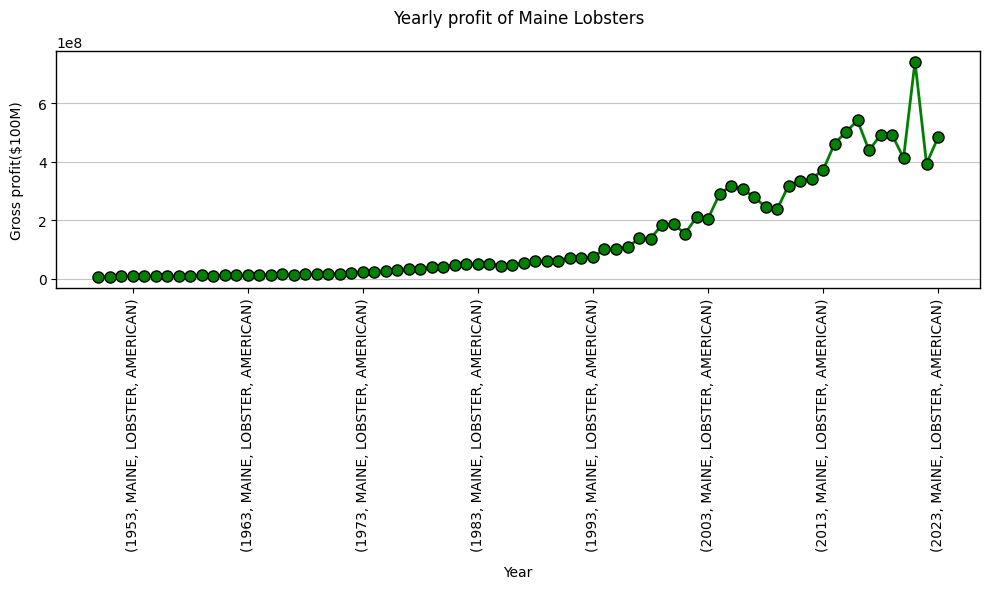

In [185]:
maine_eel =fish_h.loc[pd.IndexSlice[:, 'MAINE', 'LOBSTER, AMERICAN'], :]
price_by_year = maine_eel['Dollars']

plt.figure(figsize=(10, 6))
price_by_year.plot(
    marker='o',
    color='green',  
    markeredgecolor='black',  
    markerfacecolor='green',  
    linewidth=2,
    markersize=8
)
plt.gca().invert_xaxis()
# Formatting to match previous style
plt.title('Yearly profit of Maine Lobsters', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Gross profit($100M)', labelpad=10)
plt.grid(True, axis='y', alpha=0.75)
plt.xticks(rotation=90)

# Add black borders
for spine in plt.gca().spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

Some research shows this spike is near the end of Covid this makes sense because as an inperson job lober fishing must have become far more expensive and supply decreases, futhermore since more people cooked from homeit would not be surprising to hear that demand also rose over Covid as more home chefs looked toward premiumn ingrediants 

In [180]:
fish_h.loc[fish_h['Dollars'].idxmin()]

C:\Users\james\AppData\Local\Temp\ipykernel_27892\1654172860.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fish_h.loc[fish_h['Dollars'].idxmin()]


,,,Pounds,Dollars,Tsn,Source,state_tot,percent_tot,Dollars Per Lb
Year,State,NMFS Name,,,,,,,
2014,CONNECTICUT,DOLPHINFISH,-1.0,-2.0,168791,ACCSP,14082126.0,-0.000014,2.0


- -1 reeks of a null value but is interesting nonetheless

- Most expensive fish in 2022 (year was arbitary) along with a graph of value since 1950

In [140]:
index2 = fish_h.groupby(level = (0,1))['Dollars Per Lb'].idxmax()
expensive = fish_h.loc[index2]
expensive.loc[2022]['Dollars Per Lb'].idxmax()

('MAINE', 'EEL, AMERICAN')

In [131]:
expensive.loc[2022]['Dollars Per Lb'].idxmax()

('MAINE', 'EEL, AMERICAN')

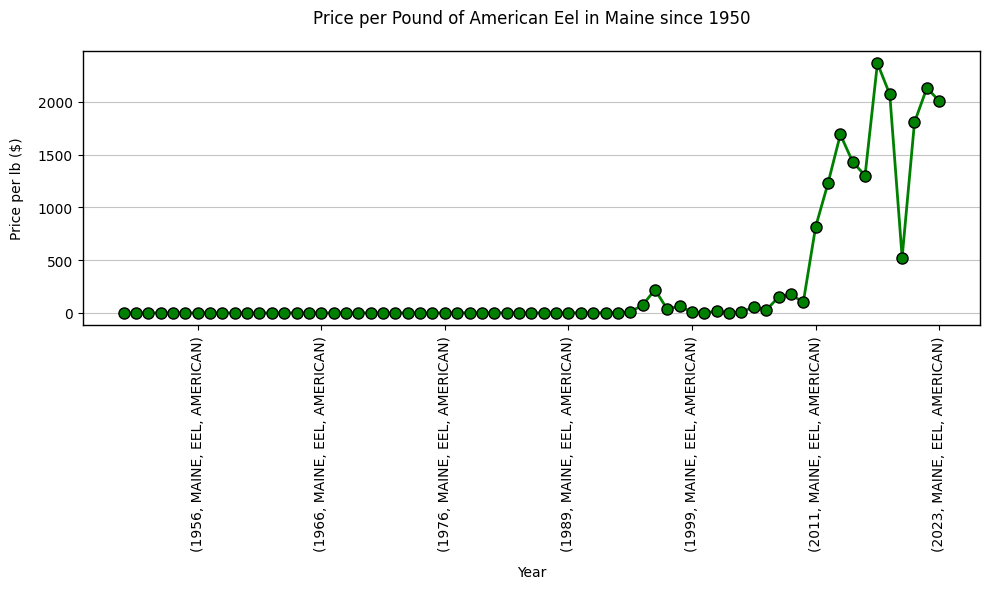

In [184]:
maine_eel =fish_h.loc[pd.IndexSlice[:, 'MAINE', 'EEL, AMERICAN'], :]
price_by_year = maine_eel['Dollars Per Lb']

plt.figure(figsize=(10, 6))
price_by_year.plot(
    marker='o',
    color='green',  
    markeredgecolor='black',  
    markerfacecolor='green',  
    linewidth=2,
    markersize=8
)
plt.gca().invert_xaxis()
# Formatting to match previous style
plt.title('Price per Pound of American Eel in Maine since 1950', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Price per lb ($)', labelpad=10)
plt.grid(True, axis='y', alpha=0.75)
plt.xticks(rotation=90)

# Add black borders
for spine in plt.gca().spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

Since Maine continues to come up on its own I wanted to explore it as a whole
- Graph of Maine fishery over two years
- I removed lobster so the scale was easier to read

C:\Users\james\AppData\Local\Temp\ipykernel_27892\1191858909.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


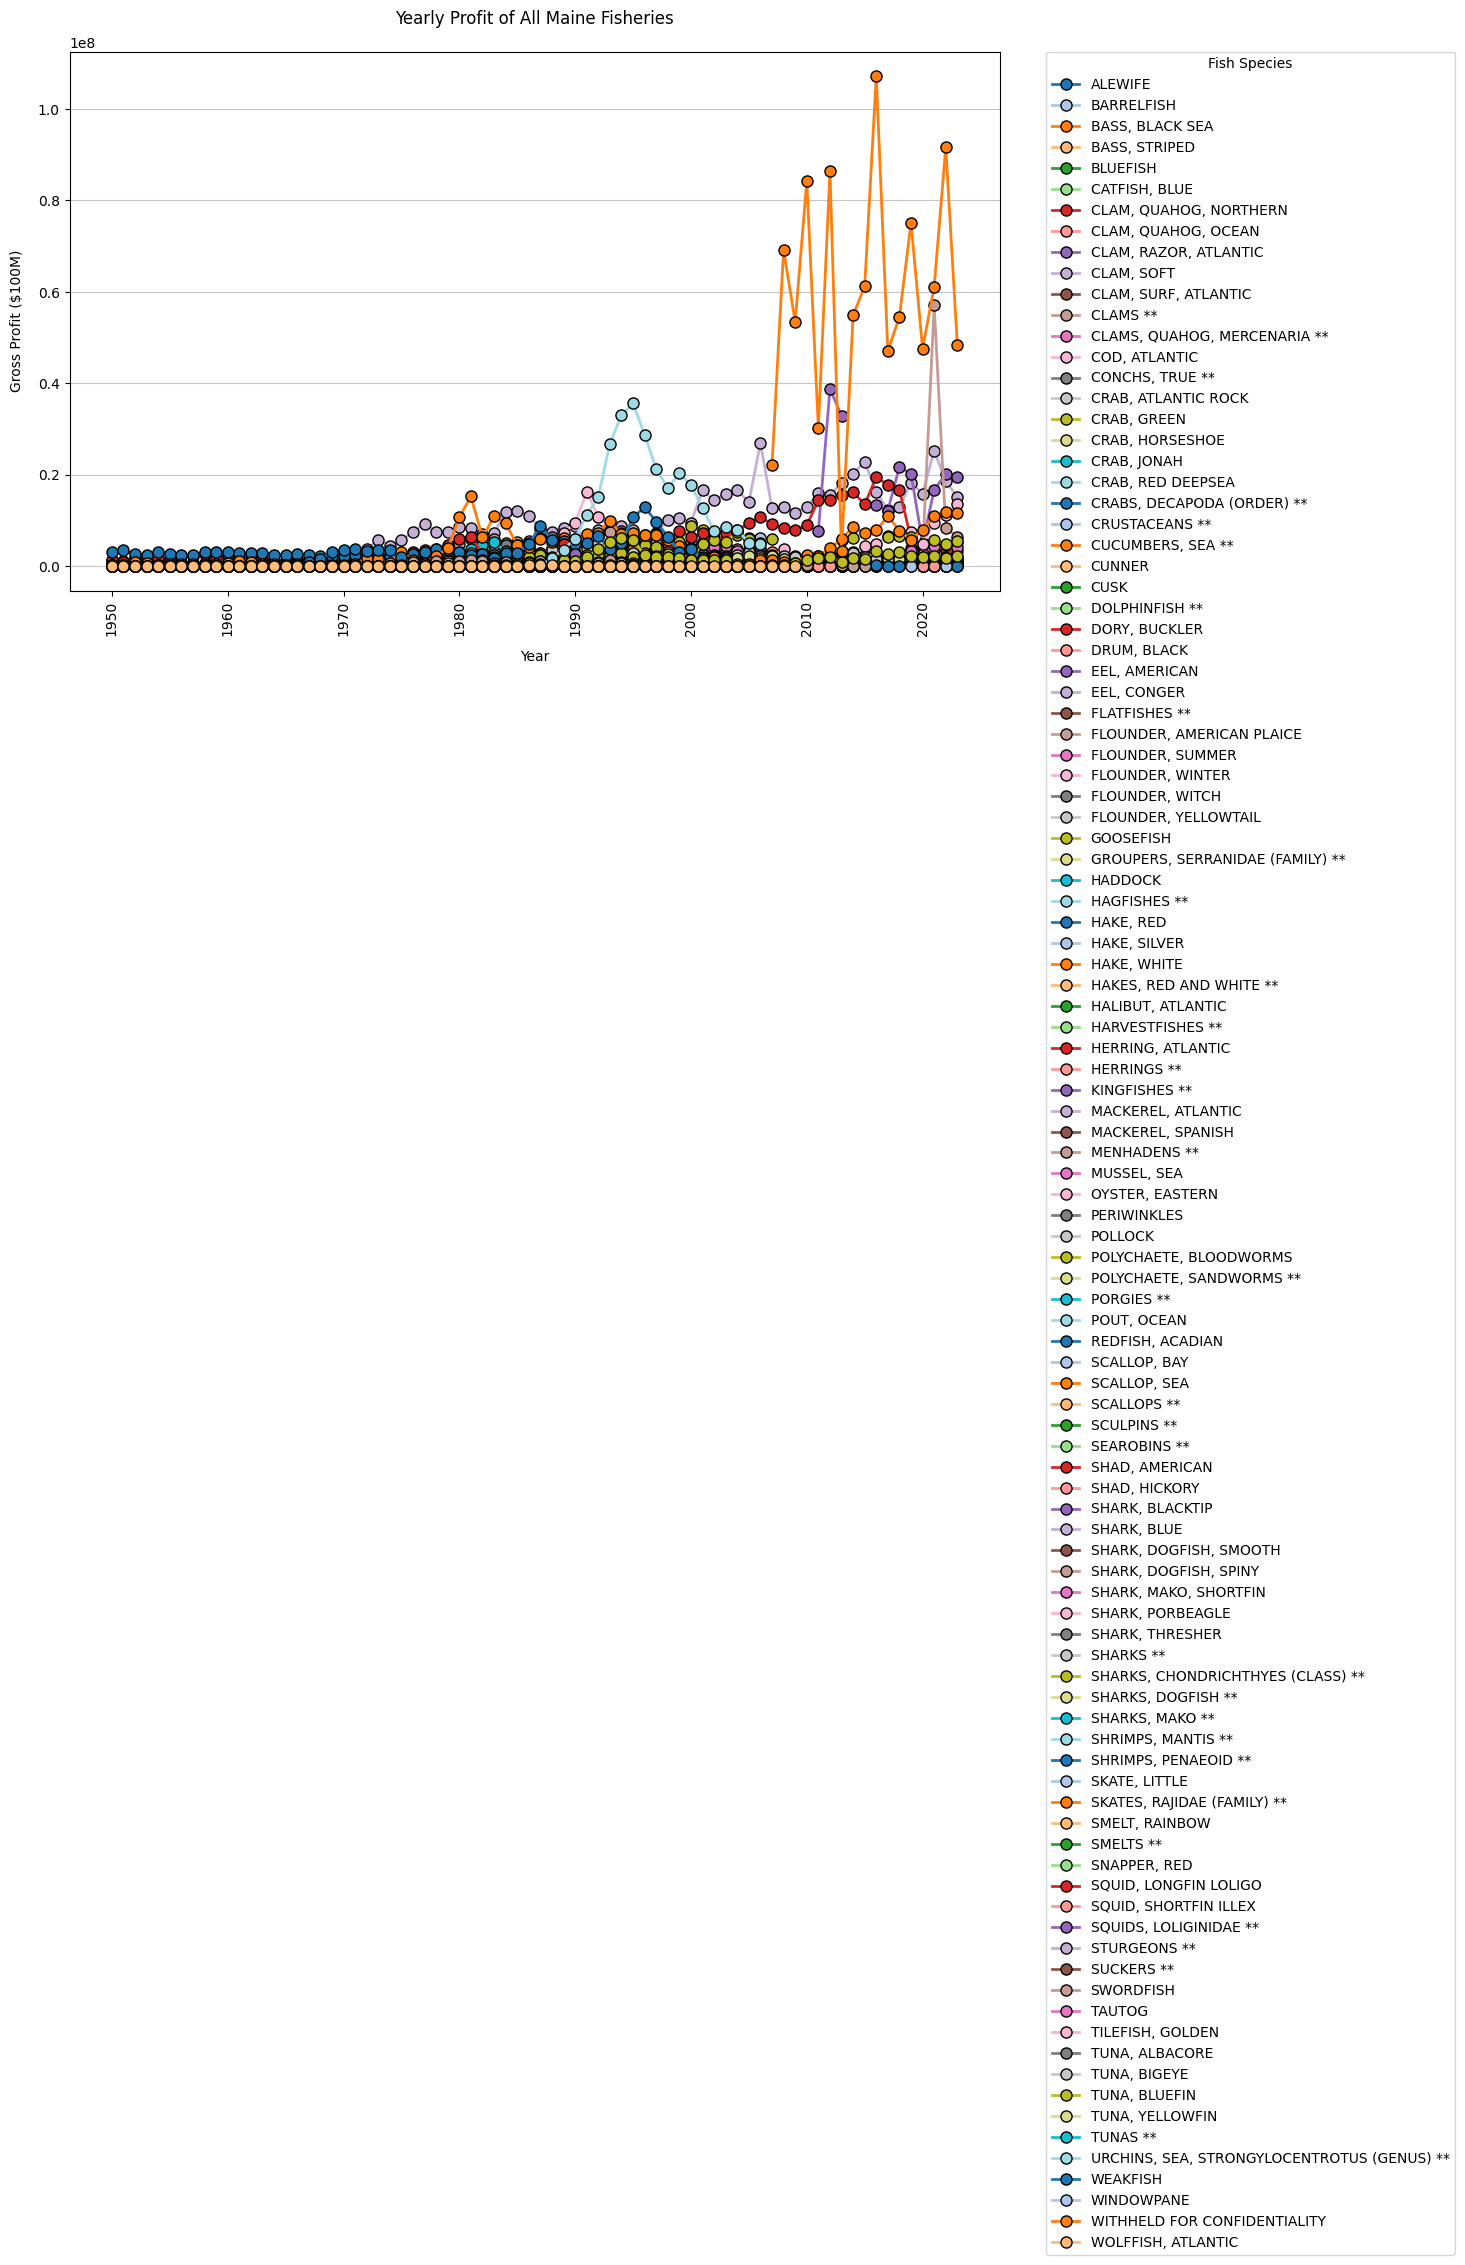

In [201]:
# Get all Maine fishing data
maine_fish = fish_h.loc[pd.IndexSlice[:, 'MAINE', :], :]
maine_fish = maine_fish[maine_fish.index.get_level_values('NMFS Name') != 'LOBSTER, AMERICAN']

# Pivot to get Dollars by Year and Species
fish_pivot = maine_fish.reset_index().pivot_table(
    index='Year',
    columns='NMFS Name',
    values='Dollars',
    aggfunc='sum'
)

# Plot setup
plt.figure(figsize=(12, 7))

# Color palette - one distinct color per species
colors = plt.cm.tab20.colors  # Using a qualitative colormap
species = fish_pivot.columns

# Plot each species
for i, species in enumerate(species):
    fish_pivot[species].plot(
        marker='o',
        color=colors[i % len(colors)],  # Cycle through colors
        markeredgecolor='black',
        markerfacecolor=colors[i % len(colors)],
        linewidth=2,
        markersize=8,
        label=species
    )

# Formatting
plt.title('Yearly Profit of All Maine Fisheries', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Gross Profit ($100M)', labelpad=10)
plt.grid(True, axis='y', alpha=0.75)
plt.xticks(rotation=90)

# Add legend outside the plot area
plt.legend(
    title='Fish Species',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

This is a neat graph but its not very practial potentially a filter of what fish contribute enough to count could be a better idea. 

Honestly I don't think their are any groundbreaking takeaways to get from this data but it was really cool to see the price of lobster connect to COVID. I also think it was a good dataset to to practice my data cleaning skills as honestly it was pretty gross.